# <center>CM3005 - Data Science Midterm Coursework</center>
### <center>Applying Linear Regression</center>

## 1 Domain-specific Area and Objectives of the Project
### 1.1 Introduction
Singapore, a small island between Malaysia and Indonesia, spans 693 sq km with 193 km of coastline. Its landscape features a central plateau with water catchments, hills like Bukit Timah at 166 m, and mangrove swamps along the northern and western coasts. The island can be split into three major regions:
- The central area houses granite deposits.
- The west has sedimentary rocks forming ridges.
- The east is flat and sandy, receiving less rainfall.

Due to urbanisation, Singapore's central hills were levelled, mangroves drained, and islets expanded for industrial use. What remains of the rainforests are three main water reservoirs in the city-state's centre. Singapore is located near sea level, so its climate is shaped by the sea and its location, avoiding earthquakes, volcanoes, or typhoons. Yet, occasional flash floods occur in low-lying areas during heavy rainfall.

### 1.2 Background Information
#### Singapore's Weather and Urban Planning
Singapore's landscape, characterised by dense urbanisation and limited arable land, poses a unique challenge for ensuring food security. In this context, urban farming yield prediction emerges as a vital avenue leveraging machine learning, specifically linear regression, to bolster the country's endeavours in cultivating an environment for local food production.

In a land-scarce environment like Singapore, where every inch of arable land is valuable, maximising yields within limited spaces becomes critical for sustainable food production. Such predictive models hold immense promise in contributing to Singapore's food security objectives. As Singapore aims to have its local produce hit 30% by 2030, these insights derived from these models can help to achieve this by influencing policy-making and fostering an environment conducive to innovation and advancements in urban agricultural practices.

### 1.3 Project Aims and Objectives
Project aims include:
1. Thoroughly explore the project objectives, taking into consideration constraints on time and resource
2. Obtain proper datasets that explore proper content
3. Clean and transform data into a usable form for future coherent analysis
4. Conduct thorough data analysis and identify trends/similarities between data
5. Understanding Rainfall Probability by building a Linear Regression Model

The project objectives are:

- Understanding Rainfall and its probability
 - Study the concept of probability related to rainfall data, looking into probabilities of various rainfall events (e.g., heavy rainfall, dry days).
 - Examine the collected data to identify trends and patterns in rainfall occurrences in Singapore.
 - Explore how rainfall totals vary and whether there are consistent trends or irregularities.

- Long-Term Trends and Significance
 - Create a linear regression model using temperature, wind speed, and previous rainfall to forecast future daily rainfall totals.
 - Analyse long-term trends in the data to identify any significant changes or shifts in rainfall patterns.
 - Investigate how rainfall patterns might influence agricultural practices or urban development in Singapore.

- Discuss how historical rainfall data could inform decisions on water management or urban infrastructure planning.

By aligning the project objectives with the rainfall dataset by Data.gov.sg, the analysis aims to provide insights into past rainfall trends, predictability using linear regression, and the potential impacts on sectors such as agriculture, urban planning, and environmental management in Singapore.

### 1.4 Analysis cause and effect
Singapore's urbanisation profoundly transformed its landscape by altering natural terrains and reclaiming land from its original habitats. Consequently, the demand surged for predictive models, mainly using linear regression techniques, aimed at comprehending and regulating rainfall patterns—an essential factor for agriculture and urban planning in a geographically restricted environment. These models wielded significant influence, optimising yields in urban farming endeavours and shaping policies to foster sustainable growth and effective resource management. Ethical considerations were also pivotal in conscientious data usage and dissemination practices amid these developments.

## 2 Dataset Description
### 1.1 Information about Dataset used
With rainfall being the main focus of this assignment, I obtained a dataset from Data.gov.sg on the 7th of Dec, 2023, recording daily rainfall and other weather parameters from 2009 to 2017. Data.gov.sg ensures transparency and accessibility for many aspiring researchers, enabling robust analysis and insights into Singapore's meteorological conditions through data.

Each entry in this dataset includes the measurement date, the data collection station, and details like daily rainfall, highest rainfall in specific timeframes, temperatures, and wind speeds. 

This dataset proves to be an invaluable resource for studying Singapore's rainfall patterns. Although structured in tabular form, which makes it easier to analyse the data, it still requires some cleaning up and reformatting for it to be properly usable.

### 1.2 Data Usage
#### 1.2.1 Requirements
Ideally, the datasets used should be cleaned and prepared properly to represent and relate to the topic, contain enough data points to provide meaningful insights, and be clean, well-organised, and free of any mistakes and inconsistencies. A dataset that meets these criteria can provide a strong foundation and efficiently help produce reliable and accurate results.

With the decision to take a broader approach to this topic, the different aspects of weather patterns, climate change and rainfall statistics can be fully showcased, broadening our insight into these topics and further evaluating how they influence one another. Taking a step back and seeing the bigger picture, we can better understand how a particular event or issue fits into the broader scheme of things and how it affects other aspects of the situation.

### 1.3 Ethical considerations
#### 1.3.1 Use of data
All data aquired and analysed is open to the public, so no anonymisation of data is required.

#### 1.3.2 Reuseage of data and derived data / Continuous use
Any person desiring to use the source datasets has to abide by the terms and conditions of each publication at the time and independently seek permission for use. Data derived from the source text, which contains words from the source, would fall under the same restrictions as the source.

Analysis and conclusions are my own.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reads CSV file and store the data in a DataFrame
df = pd.read_csv("HistoricalDailyWeatherRecords.csv")

df 

,date,station,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
0,2009-01-01,Admiralty,na,na,na,na,na,na,na,na,na
1,2009-01-02,Admiralty,na,na,na,na,na,na,na,na,na
2,2009-01-03,Admiralty,na,na,na,na,na,na,na,na,na
3,2009-01-04,Admiralty,na,na,na,na,na,na,na,na,na
4,2009-01-05,Admiralty,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...
2854,2017-11-26,Admiralty,na,na,na,na,na,na,na,na,na
2855,2017-11-27,Admiralty,na,na,na,na,na,na,na,na,na
2856,2017-11-28,Admiralty,na,na,na,na,na,na,na,na,na
2857,2017-11-29,Admiralty,na,na,na,na,na,na,na,na,na


## 3. Data preparation
### 3.1 Fundamental Dataset Cleaning

In [3]:
# Reads CSV file and store the data in a DataFrame
d1 = pd.read_csv("HistoricalDailyWeatherRecords.csv")

# Remove the 'station' column (location is standard across all readings)
d1 = d1.drop(columns=['station'])

# Columns to convert to numeric
numeric_cols = ['daily_rainfall_total', 'highest_30_min_rainfall', 'highest_60_min_rainfall',
                'highest_120_min_rainfall', 'mean_temperature', 'maximum_temperature',
                'minimum_temperature', 'mean_wind_speed', 'max_wind_speed']

# Convert columns to numeric and replace 'na' strings with NaN
for col in numeric_cols:
    d1[col] = pd.to_numeric(d1[col], errors='coerce').fillna(0.0)

# Ensure 'date' column is of datetime type
d1['date'] = pd.to_datetime(d1['date'])

# Dropping rows with ALL empty values
subset_cols = d1.columns.drop(['date'])  # Exclude 'date' column from subset

# Filter rows where all columns (excluding the specified subset) are empty
d1 = d1.dropna(subset=subset_cols, how='all')

# Count number of 0.0 values in each row
d1['zeros_count'] = (d1[numeric_cols] == 0.0).sum(axis=1)

# Filter rows with more than 5 zeros in their columns
d1 = d1[d1['zeros_count'] <= 5]

# Sort the data by date in ascending order (earliest entries first)
d1 = d1.sort_values(by='date')

# Drop the 'zeros_count' column
d1 = d1.drop(columns=['zeros_count'])

# Display the preprocessed DataFrame
d1

,date,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
21,2009-01-22,0.0,0.0,0.0,0.0,0.0,31.5,23.3,11.1,31.7
22,2009-01-23,0.0,0.0,0.0,0.0,0.0,31.9,23.8,11.4,36.0
23,2009-01-24,0.0,0.0,0.0,0.0,26.8,31.4,24.4,11.7,38.2
24,2009-01-25,0.8,0.0,0.0,0.0,25.9,27.8,24.4,12.7,38.2
25,2009-01-26,0.0,0.0,0.0,0.0,25.9,29.6,23.7,12.4,42.5
...,...,...,...,...,...,...,...,...,...,...
2843,2017-11-15,0.0,0.0,0.0,0.0,26.9,31.6,24.8,6.8,29.5
2844,2017-11-16,16.2,14.4,16.2,16.2,27.8,33.0,25.0,6.5,31.3
2845,2017-11-17,0.2,0.2,0.2,0.2,27.5,31.7,24.2,6.5,44.3
2846,2017-11-18,58.0,47.8,55.6,56.4,27.6,34.5,23.2,5.0,40.3


## 4 Statistical Analysis
### 4.1.1 Spread, Skewness and Kurtosis

In [4]:
# Calculate mean for each numeric column
means = d1[numeric_cols].mean()

# Calculate median for each numeric column
medians = d1[numeric_cols].median()

# Combine mean and median into a summary DataFrame
central_tendency = pd.concat([means, medians], axis=1)
central_tendency.columns = ['Mean', 'Median']

# Display statistical summary
print(central_tendency)

                               Mean  Median
daily_rainfall_total       6.579665     0.2
highest_30_min_rainfall    1.473263     0.0
highest_60_min_rainfall    1.798399     0.0
highest_120_min_rainfall   2.005420     0.0
mean_temperature          27.340560    27.6
maximum_temperature       31.691306    32.0
minimum_temperature       24.913714    24.9
mean_wind_speed            7.849800     7.1
max_wind_speed            34.732485    33.5


In [5]:
# Calculate standard deviation for each numeric column
std_dev = d1[numeric_cols].std()

# Display measures of spread (standard deviation)
print("Measures of Spread (Standard Deviation):")
print(std_dev)

# Calculate skewness for each numeric column excluding NaN values
skewness = d1[numeric_cols].apply(lambda x: skew(x.dropna(), nan_policy='omit'))

# Calculate kurtosis for each numeric column excluding NaN values
kurt = d1[numeric_cols].apply(lambda x: kurtosis(x.dropna(), nan_policy='omit'))

# Display skewness for each column
print("\nSkewness:")
print(skewness)

# Display kurtosis for each column
print("\nKurtosis:")
print(kurt)

Measures of Spread (Standard Deviation):
daily_rainfall_total        13.296550
highest_30_min_rainfall      4.856113
highest_60_min_rainfall      6.078947
highest_120_min_rainfall     6.852448
mean_temperature             3.060492
maximum_temperature          2.228772
minimum_temperature          1.606776
mean_wind_speed              2.438605
max_wind_speed               8.516657
dtype: float64

Skewness:
daily_rainfall_total        3.327863
highest_30_min_rainfall     4.570311
highest_60_min_rainfall     4.712790
highest_120_min_rainfall    4.952107
mean_temperature           -7.485482
maximum_temperature        -5.503085
minimum_temperature        -6.674882
mean_wind_speed             1.251052
max_wind_speed              1.047910
dtype: float64

Kurtosis:
daily_rainfall_total         15.320668
highest_30_min_rainfall      24.640600
highest_60_min_rainfall      25.767565
highest_120_min_rainfall     29.934164
mean_temperature             64.300800
maximum_temperature          72.78795

### 4.1.2 Conclusion of data
After conducting this statistical analysis, we can observe several different metrics and considerations.

- Rainfall Metrics
    -The daily rainfall totals and other various time intervals of rainfall show that there are skewed distributions and large variablility. This shows that there are extreme values or outliers present in the data.
- Temperature Metrics
    -The mean, maximum, and minimum temperatures show a low variability and hence display a consistent pattern in its measurements.
- Wind Speed Metrics
    -Looking at the data, there is a moderate ammount of variability and skewed distributions which shows potential outliers due to their deviation from normality in their kurtosis values.
- Outliers
    -High kurtosis and skewness values visualises that these outliers are present in multiple columns.
- Quality of Data
    -The quality of data is affected due to the missing values and inaccuracies in some columns calculated in the skewness and kurtosis.

In summary, there will be a need for slight cleaning and adjustments before they can be used for any application.

## 5 Visualisation
### 5.1.1 Histogram

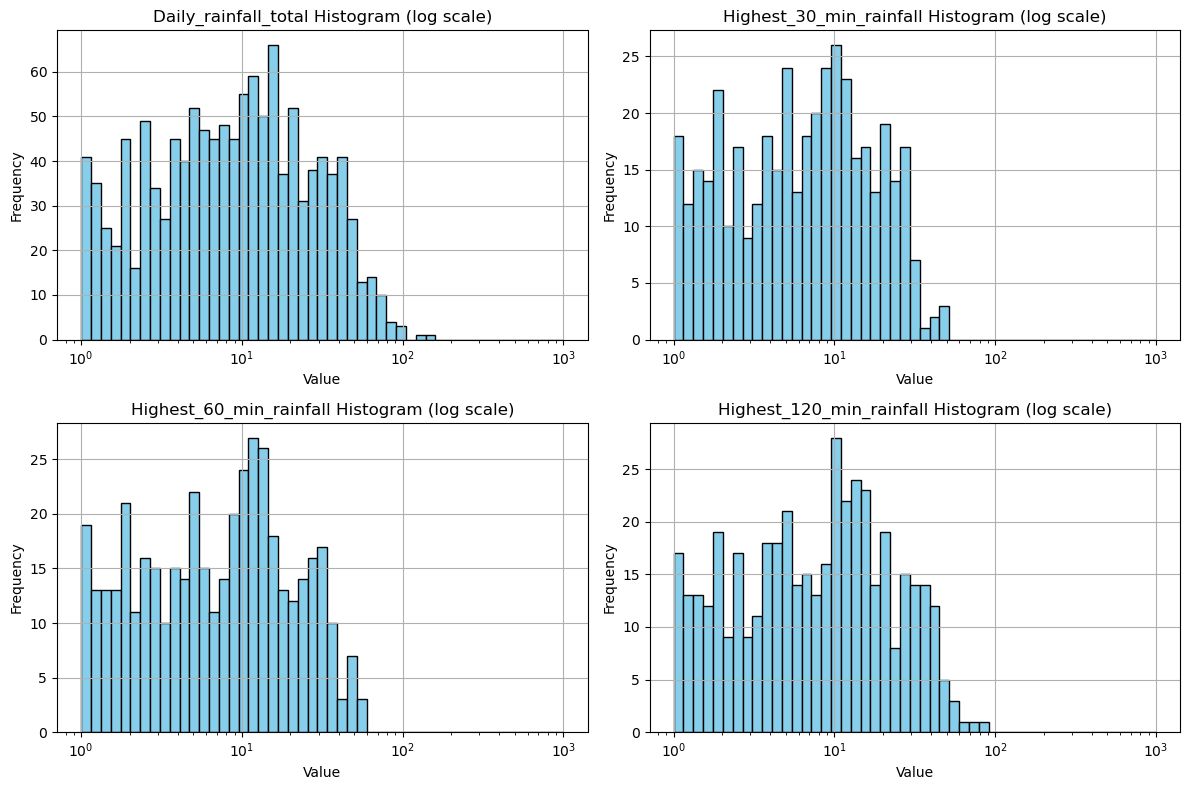

In [6]:
# Convert columns to numeric
rainfall_cols = ['daily_rainfall_total', 'highest_30_min_rainfall', 'highest_60_min_rainfall', 'highest_120_min_rainfall']
d1[rainfall_cols] = d1[rainfall_cols].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0.0
d1[rainfall_cols] = d1[rainfall_cols].fillna(0.0)

# Select relevant columns for the histogram
rainfall_data = d1[rainfall_cols]

# Remove rows with all 0.0 values in rainfall metrics
rainfall_data_without_zeros = rainfall_data[(rainfall_data != 0.0).any(axis=1)]

# Create a figure and axis for the histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

# Plot histograms for each rainfall metric after removing zeros
for i, col in enumerate(rainfall_cols):
    axs[i].hist(rainfall_data_without_zeros[col], bins=np.logspace(0, 3, 50), color='skyblue', edgecolor='black')
    axs[i].set_title(col.capitalize() + ' Histogram (log scale)')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xscale('log')
    axs[i].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### 5.1.2 Short Analysis
These Histograms show that the distribution of rainfall metrics on days that have rain are skewed slightly to the left where heavier ammounts of rainfall is more present. The use of the logarithmic scale helps in visualising the occurences of higher rainfall amounts that is not easily distinguishable with a linear scaled histogram.

### 5.2.1 Line Plot Temperature Trends

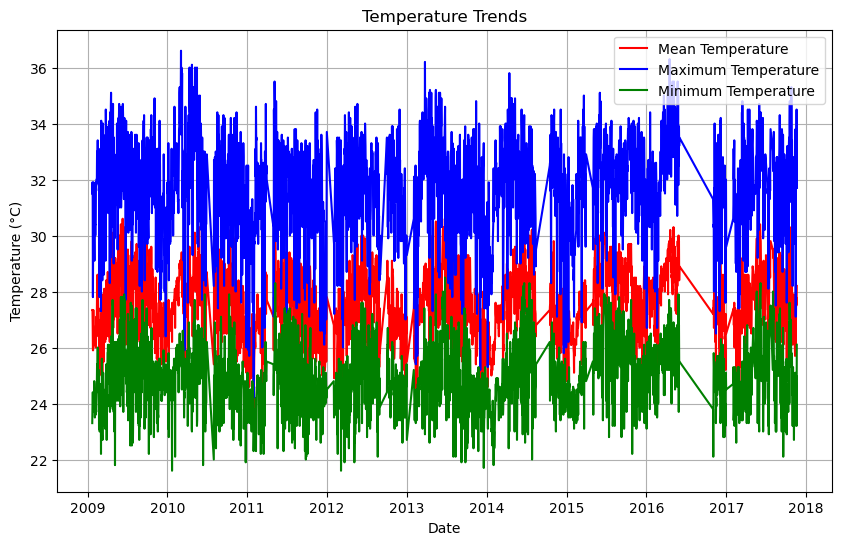

In [7]:
# Calculate average temperature for each column
mean_temperatures = d1[['mean_temperature', 'maximum_temperature', 'minimum_temperature']].mean()

# Fill 0.0 values with respective average temperatures
for col in mean_temperatures.index:
    d1[col] = d1[col].mask(d1[col] == 0.0, mean_temperatures[col])

# Plotting temperature trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Line plot for mean temperature
plt.plot(d1['date'], d1['mean_temperature'], label='Mean Temperature', color='red')

# Line plot for maximum temperature
plt.plot(d1['date'], d1['maximum_temperature'], label='Maximum Temperature', color='blue')

# Line plot for minimum temperature
plt.plot(d1['date'], d1['minimum_temperature'], label='Minimum Temperature', color='green')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends')
plt.legend()
plt.grid(True)
plt.show()

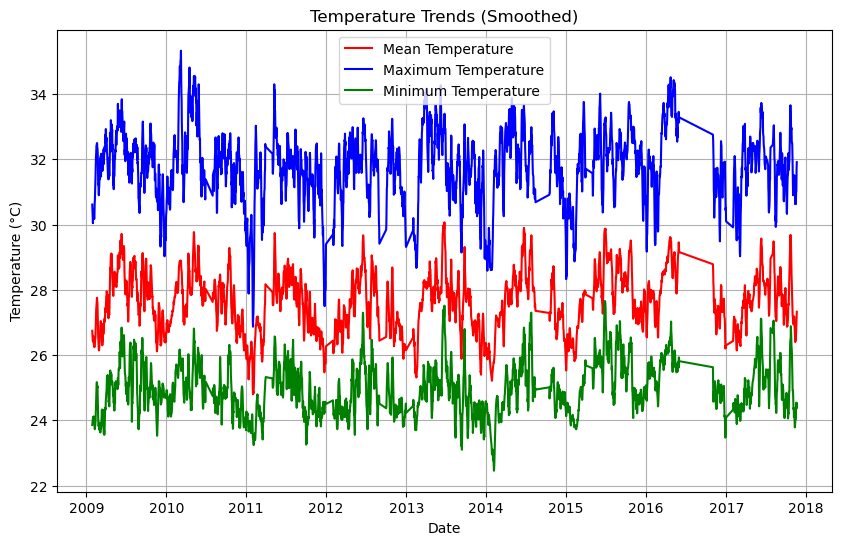

In [8]:
# Calculate average temperature for each column
mean_temperatures = d1[['mean_temperature', 'maximum_temperature', 'minimum_temperature']].mean()

# Fill 0.0 values with respective average temperatures
for col in mean_temperatures.index:
    d1[col] = d1[col].mask(d1[col] == 0.0, mean_temperatures[col])

# Select only temperature columns for rolling mean
temp_cols = ['mean_temperature', 'maximum_temperature', 'minimum_temperature']
smoothed_temps = d1[temp_cols].rolling(window=7).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Line plot for mean temperature
plt.plot(d1['date'], smoothed_temps['mean_temperature'], label='Mean Temperature', color='red')

# Line plot for maximum temperature
plt.plot(d1['date'], smoothed_temps['maximum_temperature'], label='Maximum Temperature', color='blue')

# Line plot for minimum temperature
plt.plot(d1['date'], smoothed_temps['minimum_temperature'], label='Minimum Temperature', color='green')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends (Smoothed)')
plt.legend()
plt.grid(True)
plt.show()


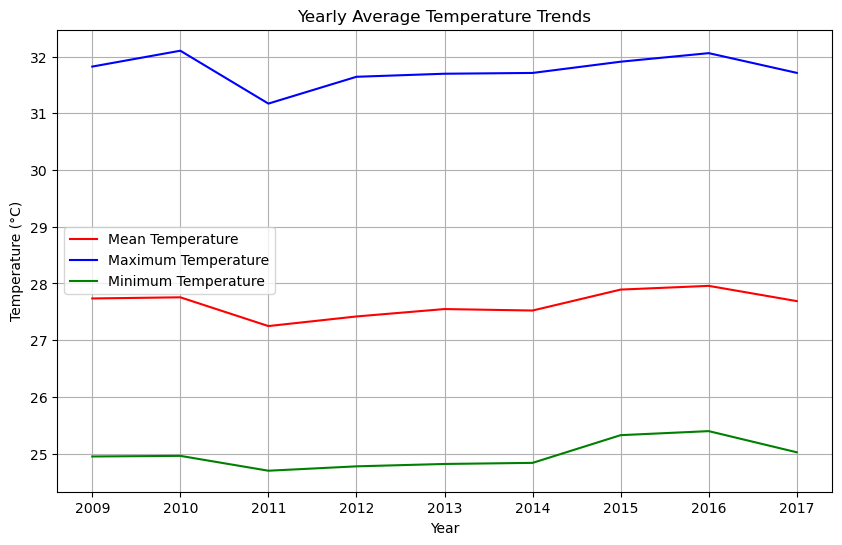

In [9]:
# Convert 'date' column to datetime if it's not already in datetime format
d1['date'] = pd.to_datetime(d1['date'])

# Calculate the yearly average temperature
yearly_avg_temp = d1.set_index('date')[['mean_temperature', 'maximum_temperature', 'minimum_temperature']].resample('Y').mean()

# Plotting yearly average temperatures
plt.figure(figsize=(10, 6))

# Line plot for mean temperature
plt.plot(yearly_avg_temp.index.year, yearly_avg_temp['mean_temperature'], label='Mean Temperature', color='red')

# Line plot for maximum temperature
plt.plot(yearly_avg_temp.index.year, yearly_avg_temp['maximum_temperature'], label='Maximum Temperature', color='blue')

# Line plot for minimum temperature
plt.plot(yearly_avg_temp.index.year, yearly_avg_temp['minimum_temperature'], label='Minimum Temperature', color='green')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Yearly Average Temperature Trends')
plt.legend()
plt.grid(True)
plt.show()


### 5.2.2 Short Analysis
These Histograms show that the distribution of rainfall metrics on days that have rain are skewed slightly to the left where heavier ammounts of rainfall is more present. The use of the logarithmic scale helps in visualising the occurences of higher rainfall amounts that is not easily distinguishable with a linear scaled histogram.

### 5.3.1 Line Plot Temperature Trends

<Figure size 800x600 with 0 Axes>

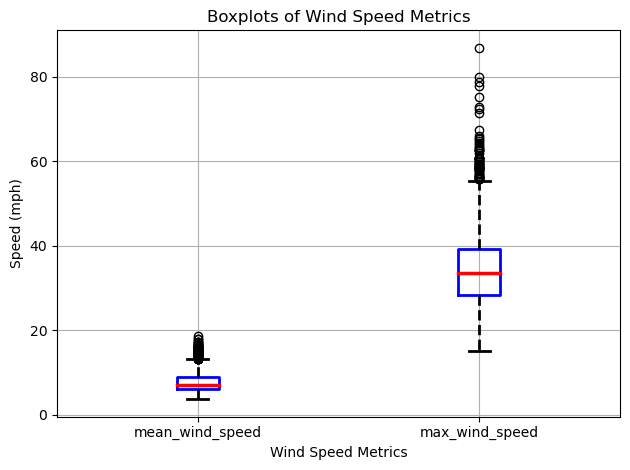

In [10]:
# Selecting wind speed columns
wind_speed_cols = ['mean_wind_speed', 'max_wind_speed']

# Creating a boxplot
plt.figure(figsize=(8, 6))

# Boxplot settings
boxprops = dict(linewidth=2, color='blue')
medianprops = dict(linestyle='-', linewidth=2.5, color='red')
whiskerprops = dict(linewidth=2, linestyle='--', color='black')
capprops = dict(linewidth=2, color='black')

# Plotting the boxplot with default settings (showing outliers)
d1[wind_speed_cols].plot(kind='box', boxprops=boxprops, medianprops=medianprops,
                         whiskerprops=whiskerprops, capprops=capprops)

plt.xlabel('Wind Speed Metrics')
plt.ylabel('Speed (mph)')
plt.title('Boxplots of Wind Speed Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.3.2 Short Analysis
These Histograms show that the distribution of rainfall metrics on days that have rain are skewed slightly to the left where heavier ammounts of rainfall is more present. The use of the logarithmic scale helps in visualising the occurences of higher rainfall amounts that is not easily distinguishable with a linear scaled histogram.

### 5.4.1 Scatter Plot Matrix

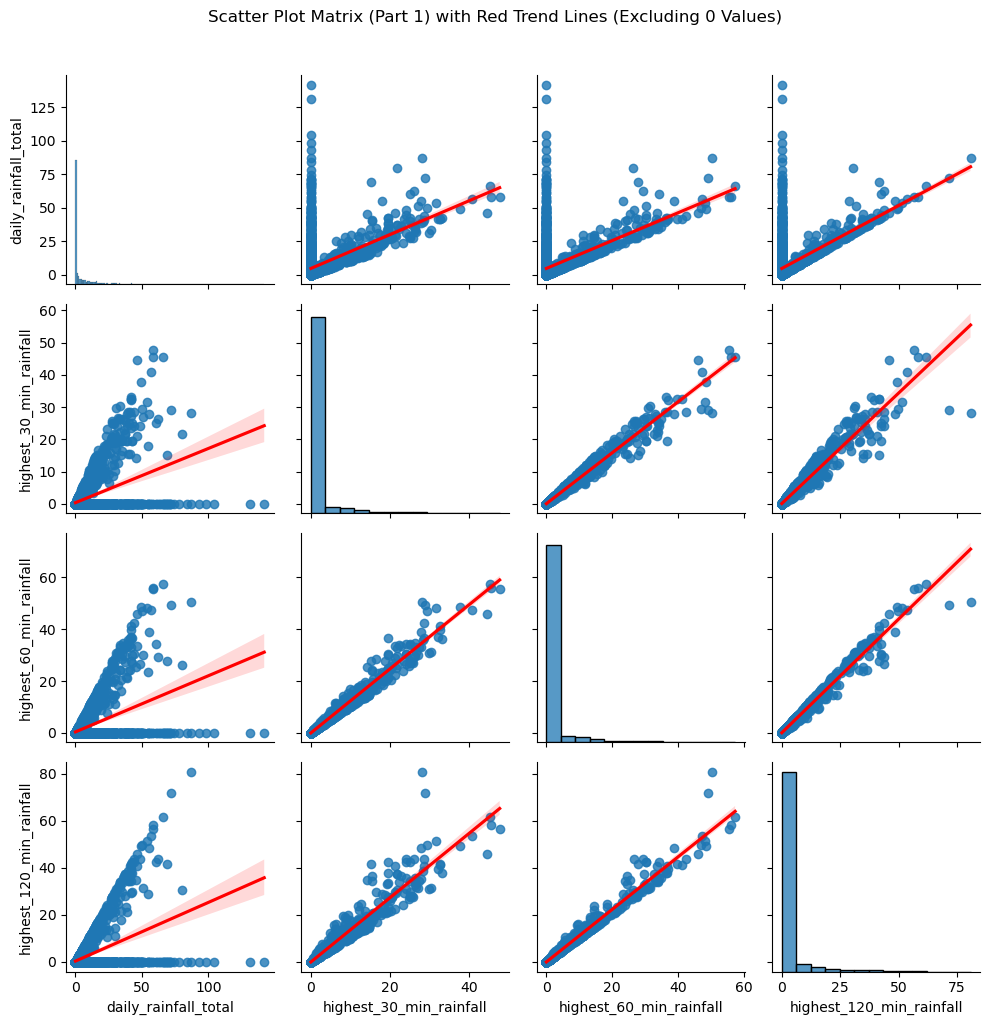

In [11]:
# First set of scatter plots
d1.set_index('date', inplace=True)

# Define columns for scatter plot matrix
scatter_cols_1 = ['daily_rainfall_total', 'highest_30_min_rainfall', 'highest_60_min_rainfall', 'highest_120_min_rainfall']

# Exclude rows with 0 values in specified columns
filtered_data = d1[(d1[scatter_cols_1] != 0).all(axis=1)]

# Scatter plot matrix with red trend lines excluding 0 values
sns.pairplot(d1[scatter_cols_1], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Scatter Plot Matrix (Part 1) with Red Trend Lines (Excluding 0 Values)', y=1.02)
plt.tight_layout()
plt.show()

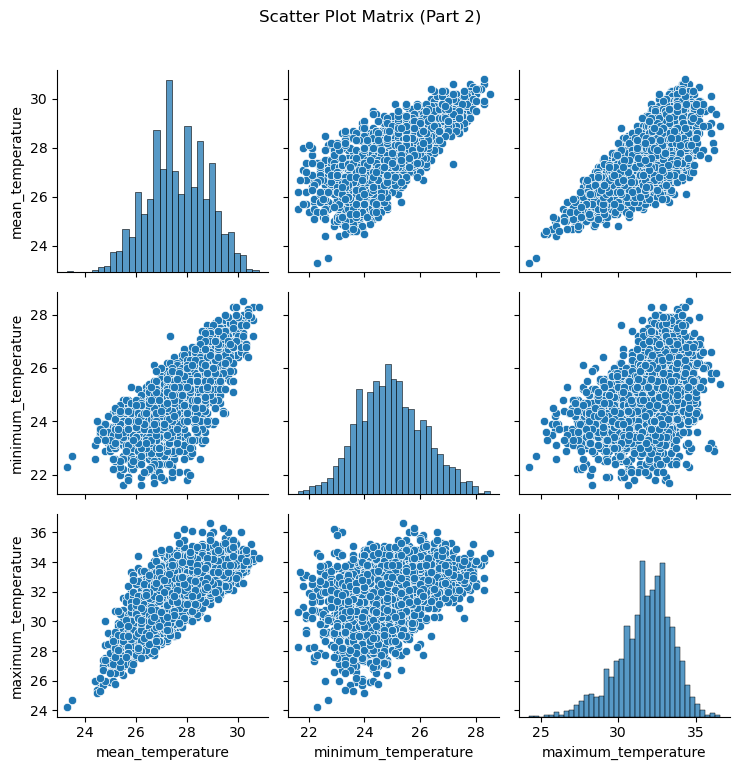

In [12]:
# Second set of scatter plots
scatter_cols_2 = ['mean_temperature', 'minimum_temperature', 'maximum_temperature']
sns.pairplot(d1[scatter_cols_2])
plt.suptitle('Scatter Plot Matrix (Part 2)', y=1.02)
plt.tight_layout()
plt.show()

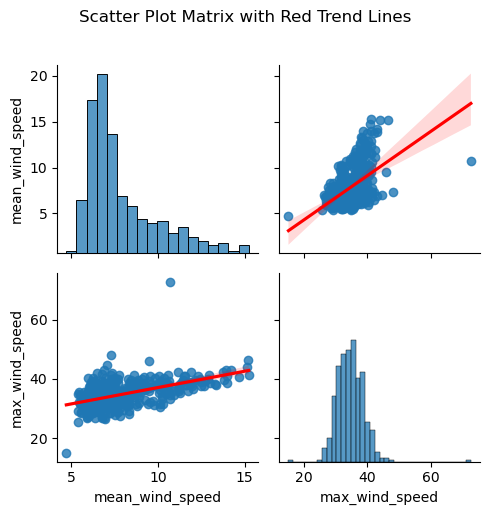

In [13]:
# Third set of scatter plots

# Group data by mean of every week
weekly_mean = d1.resample('W').mean()

# Plot scatterplot matrix
scatter_cols_3 = ['mean_wind_speed', 'max_wind_speed']
sns.pairplot(weekly_mean[scatter_cols_3], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Scatter Plot Matrix with Red Trend Lines', y=1.02)
plt.tight_layout()
plt.show()

### 5.4.2 Short Analysis
Scatter plot matrices have uncovered some potential correlations or associations between weather variables, aiding in identifying dependencies.

## 5.5 Visualisation Conclusions

Generally, the yearly rainfall in Singapore is 2,340 millimetres. However, Singapore's weather patterns are largely influenced by two monsoon seasons: the Northeast Monsoon from December to March and the Southwest Monsoon from June to September. These have played a big part in the sudden spike and fall respectively in rainfall during those periods and has affected some of the data which can be seen above. 

Additionally, other smaller monsoon periods did occur over the years and created some outliers which have affected the overall dataset as well. Besides that, windspeed and temperatures usaully are codependent on one another which also have been affected by these factors as well.

## 6 Building the ML (Machine Learning) Model
### 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features for predicting daily_rainfall_total
features = d1[['mean_temperature', 'minimum_temperature','maximum_temperature', 'mean_wind_speed', 'max_wind_speed', 'highest_30_min_rainfall', 'highest_60_min_rainfall', 'highest_120_min_rainfall']]

# Target variable
label = d1['daily_rainfall_total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print("Model R2 Score:", score)

Model R2 Score: 0.47013381939664567


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Train the model on the scaled data
model.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_scaled = model.predict(X_test_scaled)

# Calculate mean squared error for scaled data
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print("Mean Squared Error with MinMaxScaler:", mse_scaled)

Mean Squared Error with MinMaxScaler: 83.79070001350942


### 7 Validation & Further Feature Engineering

By utilising these methods, we can comprehensively validate the model's results, guaranteeing higher levels of resilience, versatility, and enhanced predictive abilities in diverse scenarios and adverse datasets.

#### 7.1 Polynomial

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
score = model.score(X_test_poly, y_test)
print("Model R2 Score with Polynomial Features:", score)

Model R2 Score with Polynomial Features: 0.5380607413067667


#### Ridge, Lasso & RandomForestRegressor

In [17]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = [
    Ridge(),
    Lasso(),
    RandomForestRegressor(n_estimators=100, random_state=42)
]

for model in models:
    model_name = model.__class__.__name__
    r2_scores = []
    mse_scores = []

    # Perform k-fold cross-validation
    for train_idx, test_idx in kf.split(features):
        X_train_kf, X_test_kf = features.iloc[train_idx], features.iloc[test_idx]
        y_train_kf, y_test_kf = label.iloc[train_idx], label.iloc[test_idx]

        # Train the model
        model.fit(X_train_kf, y_train_kf)

        # Predict and evaluate the model
        y_pred_kf = model.predict(X_test_kf)
        r2 = r2_score(y_test_kf, y_pred_kf)
        mse = mean_squared_error(y_test_kf, y_pred_kf)

        r2_scores.append(r2)
        mse_scores.append(mse)

    # Calculate mean scores
    mean_r2 = sum(r2_scores) / len(r2_scores)
    mean_mse = sum(mse_scores) / len(mse_scores)

    print(f"{model_name} - Mean R2 Score using k-fold cross-validation:", mean_r2)
    print(f"{model_name} - Mean MSE using k-fold cross-validation:", mean_mse)

Ridge - Mean R2 Score using k-fold cross-validation: 0.3781505249605149
Ridge - Mean MSE using k-fold cross-validation: 110.41689146953259
Lasso - Mean R2 Score using k-fold cross-validation: 0.3621244623132248
Lasso - Mean MSE using k-fold cross-validation: 113.53778719397243
RandomForestRegressor - Mean R2 Score using k-fold cross-validation: 0.4099129621538721
RandomForestRegressor - Mean MSE using k-fold cross-validation: 103.85722139227025


#### k-fold cross-validation

In [18]:
# Initialize the KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the Linear Regression model
model = LinearRegression()

r2_scores = []
mse_scores = []

# Perform k-fold cross-validation
for train_idx, test_idx in kf.split(features):
    X_train_kf, X_test_kf = features.iloc[train_idx], features.iloc[test_idx]
    y_train_kf, y_test_kf = label.iloc[train_idx], label.iloc[test_idx]

    # Train the model
    model.fit(X_train_kf, y_train_kf)

    # Predict and evaluate the model
    y_pred_kf = model.predict(X_test_kf)
    r2 = r2_score(y_test_kf, y_pred_kf)
    mse = mean_squared_error(y_test_kf, y_pred_kf)

    r2_scores.append(r2)
    mse_scores.append(mse)

# Calculate mean scores
mean_r2 = sum(r2_scores) / len(r2_scores)
mean_mse = sum(mse_scores) / len(mse_scores)

print("Linear Regression - Mean R2 Score using k-fold cross-validation:", mean_r2)
print("Linear Regression - Mean MSE using k-fold cross-validation:", mean_mse)


Linear Regression - Mean R2 Score using k-fold cross-validation: 0.3781447215340726
Linear Regression - Mean MSE using k-fold cross-validation: 110.41748887568274


### Model Evaluation

#### R2 Score and MSE
The model achieving scores ranging from 0.36 to 0.54. Though this is far from perfect, weather is really hard to predict for a number of reasons. The climate around us is everchanging which makes it hard for us to predict due to many external factors besides past rainfall and weather conditions. For a ten-day forecast, you have around a 50-50 chance of things going right. Beyond that, well… trust the forecast at your own risk.(Science ABC, 2022)

Mean Squared Error (MSE) / RMSE measures the average magnitude of errors and is often preferred for its interpretability as it's in the same units as the target variable. However, with the conditions and parameters these algorithms are running on, a range of 81.82 to 113.54 were produced. These although not considered accurate are still reasonable / expected outcomes of this dataset. 

#### Polynomial Features
This project model's R2 score has slightly improved from 0.47 to 0.54 when employing polynomial features, suggesting enhanced predictive capability.


### Reflection
The model achieved moderate R2 scores and relatively high MSE, suggesting a greater room for improvement. This can be achieved through the use of more datasets and more variables available to us such as loation climate history or seasonal weather pattern datasets. Albiet the outcome, the dataset could still prove worthy in providing insights to pattern recognition in this area of study. Within the domain-specific area, this model could offer insights into the relationships between features and the target variable.

All in all, before the model can be used as a makeshift foundation, it is important to make proper modifications when utilising these specific models in different domains because of the differences in data characteristics and relationships to improve on its accuracy.

### Conclusion
In summary, altough the outcome was less than desired, my personal takeway is the increase in my knowledge on climate change and weather patterns around the world. Many other factors play a part when it comes to understanding rainfall and predicting the weather than I initially thought. 

While the project's model shows promise within its domain, its applicability to other domains would require careful considerations, adjustments, and validation to ensure its effectiveness in different contexts.

### Resources Used



1. Climate of Singapore |. https://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Rainfall%20is%20plentiful%20in%20Singapore,is%200.2mm%20or%20more.%5D. Accessed 4 Jan. 2024.


2. Colbert, Angela. “Extreme Weather and Climate Change.” Climate Change: Vital Signs of the Planet, https://climate.nasa.gov/extreme-weather. Accessed 4 Jan. 2024.


3. The Science of Forecasting Ever More Extreme Weather. https://www.ft.com/content/b4fd60f2-ea5c-4dd0-8116-2d5e0d01e0ef. Accessed 4 Jan. 2024.


4. US EPA, OAR. Climate Change Indicators: Weather and Climate. 27 June 2016, https://www.epa.gov/climate-indicators/weather-climate.


5. “Why Is It So Hard To Predict The Weather?” Science ABC, 22 Jan. 2022, https://www.scienceabc.com/eyeopeners/why-is-it-so-hard-to-predict-the-weather.html.


6. Why Is Predicting the Weather So Difficult for Meteorologists? | Britannica. https://www.britannica.com/story/why-is-predicting-the-weather-so-difficult-for-meteorologists. Accessed 4 Jan. 2024.

7. World Bank Climate Change Knowledge Portal. https://climateknowledgeportal.worldbank.org/. Accessed 4 Jan. 2024.